In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Load the data set

In [2]:
car_df = pd.read_csv("car.data", names=['buying','maint','doors','persons','lug_boot','safety','class'], sep=",")
#Car Evaluation Database : http://archive.ics.uci.edu/ml/machine-learning-databases/car
car_df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

# Exploring the data set

In [3]:
car_df.describe()

buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Missing values?

In [5]:
car_df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Visualizing the data

In [6]:
def count_plot(df, columns):
    plt.figure(figsize=(15, 10))
    for indx, var  in enumerate(columns):
        plt.subplot(2, 3, indx+1)
        g = sns.countplot(df[var], hue= df['class'])
    plt.tight_layout()


features = car_df.columns.tolist()
features.remove('class')
features

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

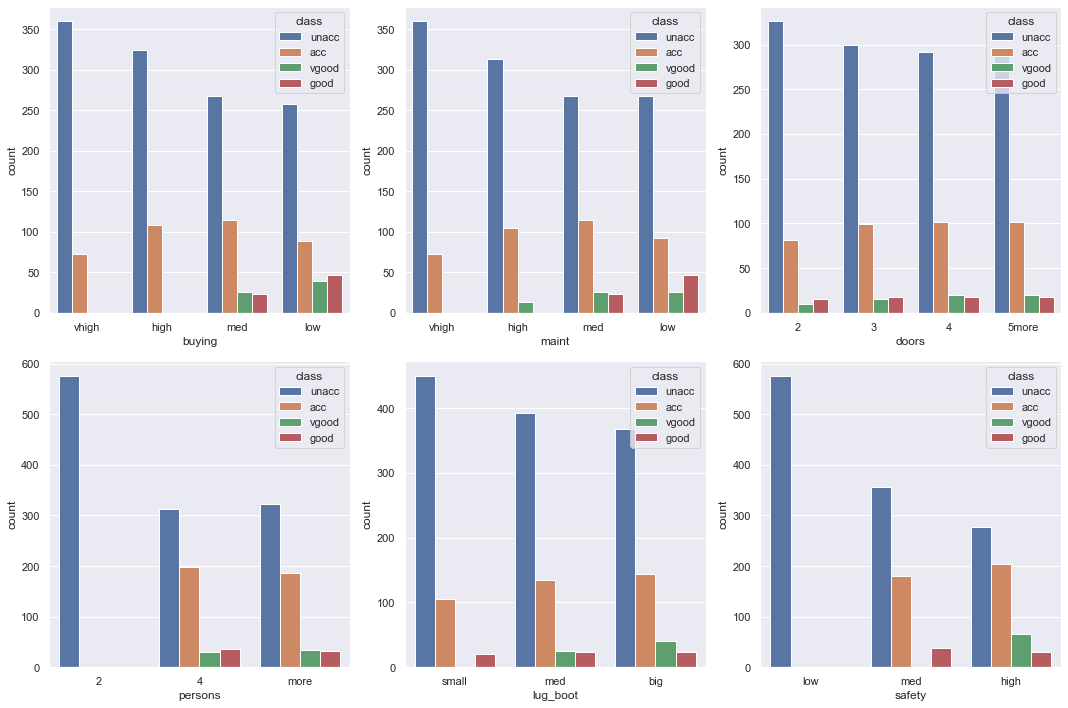

In [7]:
count_plot(car_df, features)

Correlation using vif

In [32]:
vif = pd.DataFrame()
vif["Correlation"] = [variance_inflation_factor(car_df_encoded.values, i) for i in range(len(features))]
vif["Features"] = features
vif

Correlation  Features
0     2.537474    buying
1     2.522938     maint
2     2.443242     doors
3     2.165404   persons
4     2.290247  lug_boot
5     2.240569    safety

# Encoding Categories

In [8]:
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(car_df[features])
car_df_encoded = pd.DataFrame(data_encoded, columns=features)
data_encoded

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [9]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(car_df['class'])
car_df_encoded['class'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'good', 'vgood'],
      dtype=object)

In [10]:
car_df_encoded.head()

buying  maint  doors  persons  lug_boot  safety  class
0     3.0    3.0    0.0      0.0       2.0     1.0      2
1     3.0    3.0    0.0      0.0       2.0     2.0      2
2     3.0    3.0    0.0      0.0       2.0     0.0      2
3     3.0    3.0    0.0      0.0       1.0     1.0      2
4     3.0    3.0    0.0      0.0       1.0     2.0      2

# Train and Test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(car_df_encoded.drop('class', axis=1), car_df_encoded['class'], test_size=0.3, random_state=143)

# Training/model fitting

In [17]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)
count_misclassified = (y_test != y_pred_cnb).sum()

print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_cnb)
print('Accuracy: {:.2f}'.format(accuracy))

CategoricalNB
Misclassified samples: 82
Accuracy: 0.84


In [21]:
y_pred_dtc = dtc.predict(X_test)
y_prob_pred_dtc = dtc.predict_proba(X_test)
count_misclassified = (y_test != y_pred_dtc).sum()

print("DecisionTreeClassifier")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_dtc)
print('Accuracy: {:.2f}'.format(accuracy))

DecisionTreeClassifier
Misclassified samples: 23
Accuracy: 0.96
